In [ ]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

#7.1

In [ ]:
data_path = '/content/drive/MyDrive/MachineLearning/DeepLearningWithPyTorch/dlwpt-code/data/p1ch7'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [ ]:
len(cifar10)

50000

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F5A5E9027D0>,
 1,
 'automobile')

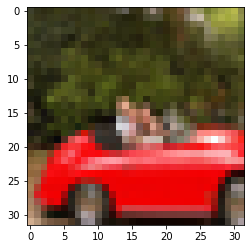

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
dir(transforms)

['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [ ]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [ ]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

In [ ]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [ ]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [ ]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

In [ ]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)

imgs.shape

torch.Size([3, 32, 32, 50000])

In [ ]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [ ]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [ ]:
transformed_cifar10 = datasets.CIFAR10(
    data_path,
    train=True,
    download=False,
    transform=transforms.Compose([
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.4914, 0.4822, 0.4465),
                                                       (0.2470, 0.2435, 0.2616))
    ])
)

cifar10_val = datasets.CIFAR10(
    data_path,
    train=False,
    download=False,
    transform=transforms.Compose([
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.4914, 0.4822, 0.4465),
                                                       (0.2470, 0.2435, 0.2616))
    ])
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show>

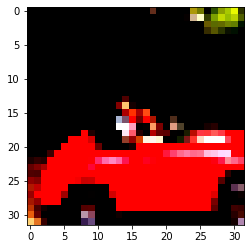

In [ ]:
img_t, _ = transformed_cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))
plt.show

#7.2

In [ ]:
label_map = {0:

In [ ]:
n_out = 2
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out)
)

In [ ]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [ ]:
x = torch.tensor([1.0, 2.0, 3.0])
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [ ]:
softmax(x).sum()

tensor(1.)

In [ ]:
softmax = nn.Softmax(dim=1)
x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [ ]:
softmax = nn.Softmax(dim=0)
x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])
softmax(x)

tensor([[0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000]])

In [ ]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out),
    nn.Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


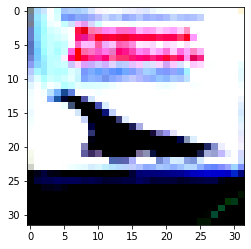

In [ ]:
img, _ = cifar2[0]
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [ ]:
img_batch = img.view(-1).unsqueeze(0)

In [ ]:
out = model(img_batch)
out

tensor([[0.5672, 0.4328]], grad_fn=<SoftmaxBackward0>)

In [ ]:
_, index = torch.max(out, dim=1)
index

tensor([0])

In [ ]:
model = nn.Sequential(nn.Linear(3072, 512),
                      nn.Tanh(),
                      nn.Linear(512, 2),
                      nn.LogSoftmax(dim=1))

In [ ]:
loss = nn.NLLLoss()

In [ ]:
out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(0.7033, grad_fn=<NllLossBackward0>)

In [ ]:
model = nn.Sequential(nn.Linear(3072, 512),
                      nn.Tanh(),
                      nn.Linear(512, 2),
                      nn.LogSoftmax(dim=1))

learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 100
for epoch in range(1, n_epochs + 1):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch: %d, Loss: %f' % (epoch, float(loss)))

Epoch: 1, Loss: 0.025271
Epoch: 2, Loss: 0.001660
Epoch: 3, Loss: 0.000956
Epoch: 4, Loss: 0.000023
Epoch: 5, Loss: 0.000006
Epoch: 6, Loss: 0.000697
Epoch: 7, Loss: 0.009125
Epoch: 8, Loss: 0.000280
Epoch: 9, Loss: 0.001699
Epoch: 10, Loss: 0.000001
Epoch: 11, Loss: 0.000032
Epoch: 12, Loss: 0.000403
Epoch: 13, Loss: 0.572934
Epoch: 14, Loss: 0.000181
Epoch: 15, Loss: 1.610052
Epoch: 16, Loss: 0.000003
Epoch: 17, Loss: 2.161906
Epoch: 18, Loss: 0.000000
Epoch: 19, Loss: 0.000000
Epoch: 20, Loss: 0.000000
Epoch: 21, Loss: 0.000000
Epoch: 22, Loss: 0.000000
Epoch: 23, Loss: 0.000127
Epoch: 24, Loss: 0.000020
Epoch: 25, Loss: 0.000000
Epoch: 26, Loss: 0.000000
Epoch: 27, Loss: 0.000000
Epoch: 28, Loss: 0.000016
Epoch: 29, Loss: 0.000158
Epoch: 30, Loss: 0.000000
Epoch: 31, Loss: 0.000000
Epoch: 32, Loss: 0.000000
Epoch: 33, Loss: 0.000000
Epoch: 34, Loss: 0.000063
Epoch: 35, Loss: 0.000648
Epoch: 36, Loss: 0.000001
Epoch: 37, Loss: 0.000000
Epoch: 38, Loss: 0.000000
Epoch: 39, Loss: 0.00

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

In [ ]:
model = nn.Sequential(nn.Linear(3072, 512),
                      nn.Tanh(),
                      nn.Linear(512, 2),
                      nn.LogSoftmax(dim=1))

learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 100
for epoch in range(1, n_epochs + 1):
    train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch: %d, Loss: %f' % (epoch, float(loss)))

Epoch: 1, Loss: 0.529105
Epoch: 2, Loss: 0.401598
Epoch: 3, Loss: 0.262345
Epoch: 4, Loss: 0.346209
Epoch: 5, Loss: 0.338289
Epoch: 6, Loss: 0.489457
Epoch: 7, Loss: 0.176892
Epoch: 8, Loss: 0.311081
Epoch: 9, Loss: 0.268271
Epoch: 10, Loss: 0.312966
Epoch: 11, Loss: 0.271628
Epoch: 12, Loss: 0.432311
Epoch: 13, Loss: 0.282202
Epoch: 14, Loss: 0.318168
Epoch: 15, Loss: 0.226480
Epoch: 16, Loss: 0.230947
Epoch: 17, Loss: 0.280015
Epoch: 18, Loss: 0.346571
Epoch: 19, Loss: 0.375580
Epoch: 20, Loss: 0.544100
Epoch: 21, Loss: 0.371215
Epoch: 22, Loss: 0.227224
Epoch: 23, Loss: 0.261487
Epoch: 24, Loss: 0.286891
Epoch: 25, Loss: 0.384622
Epoch: 26, Loss: 0.194154
Epoch: 27, Loss: 0.262914
Epoch: 28, Loss: 0.132032
Epoch: 29, Loss: 0.355795
Epoch: 30, Loss: 0.420400
Epoch: 31, Loss: 0.282272
Epoch: 32, Loss: 0.126941
Epoch: 33, Loss: 0.321577
Epoch: 34, Loss: 0.234610
Epoch: 35, Loss: 0.222104
Epoch: 36, Loss: 0.226741
Epoch: 37, Loss: 0.269165
Epoch: 38, Loss: 0.306935
Epoch: 39, Loss: 0.20

In [ ]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)
correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print('Accuracy: %f' % (correct / total))

Accuracy: 0.994500
